### Demonstração do Algoritmo de classificação binária

#### Os algoritmos de classificação binária dividem os dados em duas categorias. Esse algoritmos são úteis para problemas que possuem duas repostas que são mutuamente exclusivas, como exemplo perguntas com repostas sim ou não.
#### * A conservação de um determinado alimento durará 3 meses em um ambiente resfriado a 30° celsius? Sim ou Não
#### * O que retorna mais lucro: valor de ajuste de preço ou desconto para o produto?

#### Para realizar o processo de classificação iremos utilizar o algoritmo KNN(K-Nearest Neighbors). O algoritmo KNN classifica novos dados com base em uma medida de similaridade entre seus “vizinhos” mais próximos, ou seja, aqueles que têm características semelhantes às suas.
#### O algoritmo KNN pressupõe que itens semelhantes estão próximos um dos outros, então tenta encaixar o dado em questão nos conjuntos de seus vizinhos. O que vai mudar é o valor de K, a primeira letra da sigla, que vai ser a distância entre o dado e os seus vizinhos. Quanto menor a distância, mais chance de serem mais semelhantes.
#### * Exemplo: 

In [1]:
import pandas as pd # biblioteca para manipulação de dados
import matplotlib.pyplot as plt # construção de gráficos

from sklearn import model_selection # Biblioteca com função para divisão dos dados
from sklearn.neighbors import KNeighborsClassifier # Algoritmo KNN
from sklearn.metrics import confusion_matrix # Função para matriz de decisão
from sklearn.metrics import accuracy_score # Função para calculo de acurácia

In [2]:
arquivo_url = "dados.csv"

In [3]:
names = ["Temperatura(C°)", "Pressão(bar)", "Classe"]

In [4]:
df = pd.read_csv(arquivo_url, names=names)

In [11]:
dataframe = pd.DataFrame(df)
dataframe

,Temperatura(C°),Pressão(bar),Classe
0,74.043405,6.124853,0
1,275.321247,4.854299,0
2,281.119343,2.655200,1
3,248.928634,4.220856,1
4,184.854345,6.589066,1
...,...,...,...
195,322.439280,4.192454,0
196,351.894223,2.938331,1
197,152.052504,6.326105,0
198,214.694815,4.841906,1


In [13]:
array = df.values
array

array([[ 74.0434047 ,   6.12485333,   0.        ],
       [275.32124683,   4.85429931,   0.        ],
       [281.11934296,   2.65520023,   1.        ],
       [248.92863396,   4.22085557,   1.        ],
       [184.85434478,   6.58906618,   1.        ],
       [ 75.00230967,   6.13977988,   0.        ],
       [249.00886129,   5.57837961,   0.        ],
       [136.38503766,   5.15209549,   0.        ],
       [ 99.4852995 ,   4.54439175,   0.        ],
       [298.07763829,   3.8315507 ,   0.        ],
       [234.21643828,   6.22884884,   0.        ],
       [379.42034966,   2.3622835 ,   1.        ],
       [346.53180823,   2.47737476,   1.        ],
       [253.85513319,   6.37376275,   0.        ],
       [ 99.29304015,   5.92436959,   0.        ],
       [163.23490806,   5.83870282,   0.        ],
       [ 80.07024677,   5.76194632,   0.        ],
       [258.62336831,   6.20618781,   0.        ],
       [281.88831101,   6.77156501,   0.        ],
       [377.70818756,   3.17349

array([[<Axes: title={'center': 'Temperatura(C°)'}>,
        <Axes: title={'center': 'Pressão(bar)'}>],
       [<Axes: title={'center': 'Classe'}>, <Axes: >]], dtype=object)

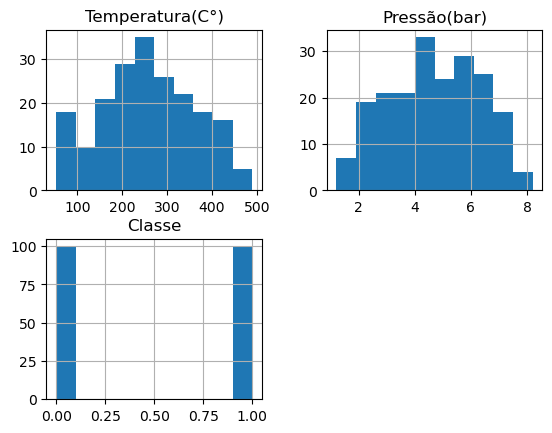

In [15]:
df.hist()

In [18]:
X = array[:, 0:2]
X

array([[ 74.0434047 ,   6.12485333],
       [275.32124683,   4.85429931],
       [281.11934296,   2.65520023],
       [248.92863396,   4.22085557],
       [184.85434478,   6.58906618],
       [ 75.00230967,   6.13977988],
       [249.00886129,   5.57837961],
       [136.38503766,   5.15209549],
       [ 99.4852995 ,   4.54439175],
       [298.07763829,   3.8315507 ],
       [234.21643828,   6.22884884],
       [379.42034966,   2.3622835 ],
       [346.53180823,   2.47737476],
       [253.85513319,   6.37376275],
       [ 99.29304015,   5.92436959],
       [163.23490806,   5.83870282],
       [ 80.07024677,   5.76194632],
       [258.62336831,   6.20618781],
       [281.88831101,   6.77156501],
       [377.70818756,   3.17349304],
       [269.32074633,   5.74533087],
       [204.54111819,   5.4853314 ],
       [314.15335869,   4.80143775],
       [235.16943405,   3.74511265],
       [264.80299024,   5.86217731],
       [166.05762616,   6.56482051],
       [419.62333427,   3.22101201],
 

In [19]:
y = array[:, 2]
y

array([0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1.])

In [27]:
# plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', s=20, label='0')
# plt.scatter(X[y==1, 0], X[y==1, 1], c='red', s=20, label='1')

# plt.xlabel('Temperatura ($^\circ C$)')
# plt.ylabel('Pressão (bar)')
# plt.legend(loc='upper right')

In [29]:
teste_size_train = 0.2
seed=6

In [30]:
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X, y, test_size = teste_size_train, random_state=seed)

In [34]:
# plt.scatter(X_validation[y_validation==0, 0], X_validation[y_validation==0, 1], c='blue', s=20, label='0')
# plt.scatter(X_validation[y_validation==1, 0], X_validation[y_validation==1, 1], c='red', s=20, label='1')

# plt.xlabel('Temperatura ($^\circ C$)')
# plt.ylabel('Pressão (bar)')
# plt.legend(loc='upper right')

### Implementação do algoritmo KNN

In [38]:
# Definindo a utilização do modelo com 3 vizinhos
model = KNeighborsClassifier(n_neighbors = 3)

# Ajustando o modelo com o conjunto de treino
clf = model.fit(X_train, y_train)

# Fazer predições
predictions = model.predict(X_validation)

# Utilizando a predição obtida para calcular e obter a acurácia
print(accuracy_score(y_validation, predictions))
# Utilizando a predição obtida para calcular e obter a matrix de confusão
print(confusion_matrix(y_validation, predictions))


0.725
[[17  4]
 [ 7 12]]


#### Processo de estimativa do modelo

In [42]:
Temp = 300 #°c
Press = 2 #bar

classe = model.predict([[Temp,Press]])
print('Classificação dos dados', classe)

Classificação dos dados [1.]
